In [1]:
import os
os.chdir('../../')

import DeepPurpose.DTI as models
from DeepPurpose.utils import *
from DeepPurpose.dataset import *
import Processing.dataset_filter as processors

if not os.path.exists('./result/DeepDTA'):
    os.makedirs('./result/DeepDTA')

In [2]:
df = pd.read_csv('./data/r2/title_r2_5k.csv', sep = ',', error_bad_lines=False)
X_drug, X_target, y = df['Drug'].values, df['Target'].values, df['Label'].values

drug_encoding = 'CNN'
target_encoding = 'CNN'
train, val, test = data_process(X_drug, X_target, y,
                                drug_encoding, target_encoding,
                                split_method='random',frac=[0.7,0.1,0.2])

# use the parameters setting provided in the paper: https://arxiv.org/abs/1801.10193
config = generate_config(drug_encoding = drug_encoding,
                         target_encoding = target_encoding,
                         cls_hidden_dims = [1024,1024,512],
                         train_epoch = 100,
                         LR = 0.001,
                         batch_size = 256,
                         cnn_drug_filters = [32,64,96],
                         cnn_target_filters = [32,64,96],
                         cnn_drug_kernels = [4,6,8],
                         cnn_target_kernels = [4,8,12]
                         )


Drug Target Interaction Prediction Mode...
in total: 5000 drug-target pairs
encoding drug...
unique drugs: 4853
encoding protein...
unique target sequence: 1034
splitting dataset...
Done.


Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 52.1987. Total time 0.00027 hours
Validation at Epoch 1 with loss:4.13575, MSE: 4.17276 , Pearson Correlation: 0.06442 with p-value: 1.50E-01 , Concordance Index: 0.51421
Training at Epoch 2 iteration 0 with loss 4.41097. Total time 0.00472 hours
Validation at Epoch 2 with loss:2.09753, MSE: 2.14839 , Pearson Correlation: 0.09765 with p-value: 2.90E-02 , Concordance Index: 0.52105
Training at Epoch 3 iteration 0 with loss 1.85913. Total time 0.01 hours
Validation at Epoch 3 with loss:2.10554, MSE: 2.18721 , Pearson Correlation: 0.12831 with p-value: 4.05E-03 , Concordance Index: 0.53234
Training at Epoch 4 iteration 0 with loss 2.12239. Total time 0.01611 hours
Validation at Epoch 4 with loss:2.58907, MSE: 2.20728 , Pearson Correlation: 0.16802 with p-value: 1.60E-04 , Concordance Index: 0.54655
Training at Epoch 5 iteration 0 with loss 2.64059. Total time 0.02194 hours
Validatio

Training at Epoch 39 iteration 0 with loss 0.73364. Total time 0.22333 hours
Validation at Epoch 39 with loss:2.18590, MSE: 2.08767 , Pearson Correlation: 0.46122 with p-value: 1.05E-27 , Concordance Index: 0.64325
Training at Epoch 40 iteration 0 with loss 0.61672. Total time 0.22861 hours
Validation at Epoch 40 with loss:2.07919, MSE: 2.06059 , Pearson Correlation: 0.47382 with p-value: 2.39E-29 , Concordance Index: 0.64882
Training at Epoch 41 iteration 0 with loss 0.51095. Total time 0.23416 hours
Validation at Epoch 41 with loss:1.85889, MSE: 1.97013 , Pearson Correlation: 0.45613 with p-value: 4.62E-27 , Concordance Index: 0.64459
Training at Epoch 42 iteration 0 with loss 0.35330. Total time 0.23944 hours
Validation at Epoch 42 with loss:1.77951, MSE: 2.03194 , Pearson Correlation: 0.45338 with p-value: 1.02E-26 , Concordance Index: 0.64316
Training at Epoch 43 iteration 0 with loss 0.32203. Total time 0.24472 hours
Validation at Epoch 43 with loss:2.04493, MSE: 1.98036 , Pearso

Validation at Epoch 77 with loss:2.05607, MSE: 2.13769 , Pearson Correlation: 0.43325 with p-value: 2.70E-24 , Concordance Index: 0.63635
Training at Epoch 78 iteration 0 with loss 0.13586. Total time 0.40361 hours
Validation at Epoch 78 with loss:2.37129, MSE: 2.35134 , Pearson Correlation: 0.43842 with p-value: 6.67E-25 , Concordance Index: 0.63667
Training at Epoch 79 iteration 0 with loss 0.23194. Total time 0.40833 hours
Validation at Epoch 79 with loss:2.45257, MSE: 2.43999 , Pearson Correlation: 0.42586 with p-value: 1.91E-23 , Concordance Index: 0.63178
Training at Epoch 80 iteration 0 with loss 0.20968. Total time 0.4125 hours
Validation at Epoch 80 with loss:2.30399, MSE: 2.23768 , Pearson Correlation: 0.42201 with p-value: 5.17E-23 , Concordance Index: 0.63165
Training at Epoch 81 iteration 0 with loss 0.14836. Total time 0.41722 hours
Validation at Epoch 81 with loss:2.35239, MSE: 2.23309 , Pearson Correlation: 0.42942 with p-value: 7.46E-24 , Concordance Index: 0.63412
Tra

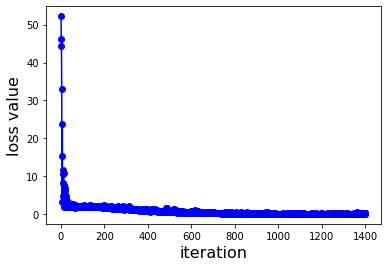

In [3]:
model = models.model_initialize(**config)
model.train(train, val, test)

In [4]:
model.save_model('./result/DeepDTA/r2/model_r2_5k_100epochs')